In [1]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import scipy
import scipy.ndimage
import skimage
from skimage import io
import skimage.transform

Text(0.5, 1.0, 'cameraman')

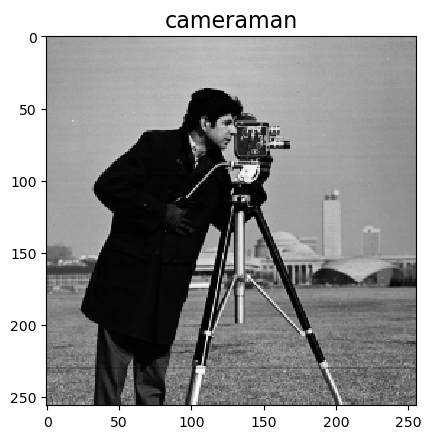

In [2]:
I_cameraman = io.imread('cameraman.tif')
I_cameraman = I_cameraman.astype('float32')
#
fig, ax = plt.subplots()
ax.imshow(I_cameraman, cmap='gray', interpolation='nearest')
ax.set_title('cameraman', fontsize=16)

### Gabor Kernels

In [5]:
def gabor_kernel(frequency, theta=0, bandwidth=1, 
                 sigma_x=None, sigma_y=None,
                 n_stds=3, offset=0, half_size=None):
    if sigma_x is None:
        sigma_x = _sigma_prefactor(bandwidth) / frequency
    if sigma_y is None:
        sigma_y = _sigma_prefactor(bandwidth) / frequency

    x0 = np.ceil(max(np.abs(n_stds * sigma_x * np.cos(theta)),
                     np.abs(n_stds * sigma_y * np.sin(theta)), 1))
    y0 = np.ceil(max(np.abs(n_stds * sigma_y * np.cos(theta)),
                     np.abs(n_stds * sigma_x * np.sin(theta)), 1))

    if half_size != None:
        x0 = half_size[0]
        y0 = half_size[1] 
          
    y, x = np.mgrid[-y0:y0 + 1, -x0:x0 + 1]

    rotx = x * np.cos(theta) + y * np.sin(theta)
    roty = -x * np.sin(theta) + y * np.cos(theta)

    g = np.zeros(y.shape, dtype=np.complex128)
    g[:] = np.exp(-0.5 * (rotx ** 2 / sigma_x ** 2 + roty ** 2 / sigma_y ** 2))
    g /= 2 * np.pi * sigma_x * sigma_y
    g *= np.exp(1j * (2 * np.pi * frequency * rotx + offset))

    return g

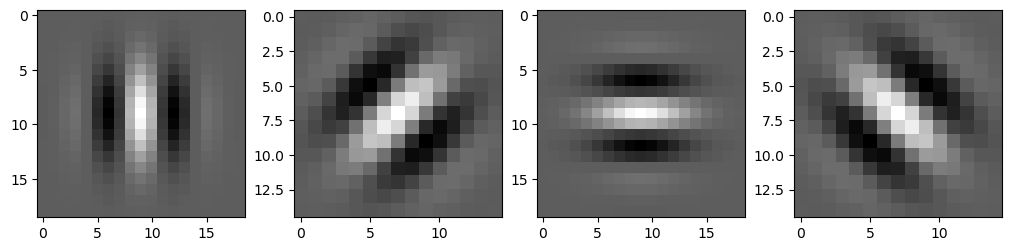

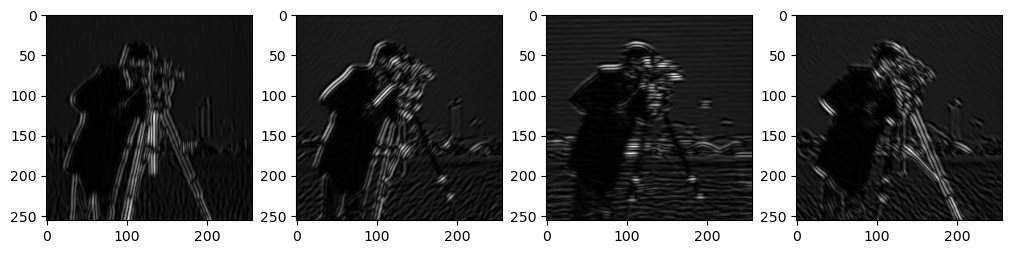

In [6]:
# prepare filter bank kernels
kernel_list = []
for n in range(0, 4):
    theta = n / 4 * np.pi
    kernel = np.real(gabor_kernel(0.15, theta=theta, sigma_x=3, sigma_y=3))
    kernel_list.append(kernel)
fig, ax = plt.subplots(1,4, figsize=(10, 8), constrained_layout=True)
for n in range(0, 4):
    ax[n].imshow(kernel_list[n], cmap = 'gray')
#    
fig, ax = plt.subplots(1,4, figsize=(10, 8), constrained_layout=True)
for n in range(0, 4):
    I_n = scipy.ndimage.correlate(I_cameraman, kernel_list[n], mode='nearest')
    I_n = np.abs(I_n)
    ax[n].imshow(I_n, cmap = 'gray')    

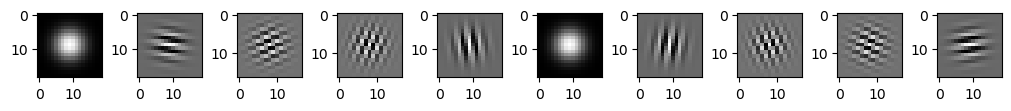

In [7]:
# prepare filter bank kernels
kernel_list = []
for n in range(0, 10):
    theta = n / 10 * np.pi
    kernel = np.real(gabor_kernel(1, theta=theta, sigma_x=3, sigma_y=3))
    kernel_list.append(kernel)
fig, ax = plt.subplots(1,10, figsize=(10, 8), constrained_layout=True)
for n in range(0, 10):
    ax[n].imshow(kernel_list[n], cmap = 'gray') 

### The Weight/kernel tensor of the first layer of a 2D CNN could be similar to Gabor filters